In [ ]:
! unzip -q "/content/drive/MyDrive/Colab Notebooks/Human_Activity_Recognition/imageDataset.zip"

replace imageDataset/Walking/00045/08.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
! pip install ultralytics==8.0.186
! pip install supervision==0.2.0
from IPython import display
display.clear_output()

In [ ]:
from tqdm.auto import tqdm
from ultralytics import YOLO
import  supervision as sv
import numpy as np
import cv2
import pandas as pd
from glob import glob
import os

In [ ]:
orig_shape= (480, 640)

In [ ]:
# MODEL
MODEL = "yolov8x-pose.pt"
model = YOLO(MODEL)

In [ ]:
source_dir = 'imageDataset'
dist_dir = 'pose_dataset'

In [ ]:
img_paths = glob(f"{source_dir}/*/*/*.jpg")
len(img_paths)

In [ ]:
for img_path in tqdm(img_paths):
    source_path = img_path.replace(source_dir, dist_dir)
    dist_path = source_path.replace('.jpg', '.npy')
    if os.path.exists(dist_path):
        continue
    os.makedirs(os.path.dirname(dist_path), exist_ok=True)

    img = cv2.imread(img_path)
    results = model(img)[0]
    detections = sv.Detections.from_yolov8(results)
    all_keypoints = results.keypoints.cpu().numpy()
    if len(all_keypoints) == 0:
        p1_data = np.zeros((1, 17, 3))
        p2_data = np.zeros((1, 17, 3))
        # print(f"1: p1 = {p1_data.shape} p2 = {p2_data.shape} img: {source_path}")
    elif len(all_keypoints) == 1:
        p1_data = all_keypoints[0].data
        p2_data = np.zeros((1, 17, 3))
        # print(f"2: p1 = {p1_data.shape} p2 = {p2_data.shape} img: {source_path}")
    elif len(all_keypoints) > 1:
        p1_data = all_keypoints[0].data
        p2_data = all_keypoints[1].data
        # print(f"3: p1 = {p1_data.shape} p2 = {p2_data.shape} img: {source_path}")
    try:
        if p1_data.shape != (1,17,3):
            print("p1 shape not match")
            p1_data = np.zeros((1, 17, 3))
        if p2_data.shape != (1,17,3):
            print("p2 shape not match")
            p2_data = np.zeros((1, 17, 3))
        data = np.array([p1_data[0], p2_data[0]])
    except Exception as e:
        print(e)
        print(p1_data[0].shape)
        print(p2_data[0].shape)
        print(p1_data)
        break
    np.save(dist_path, data)

In [ ]:
! zip -q -r "pose_dataset.zip" "pose_dataset"

# Extract features

In [ ]:
! pip install ultralytics
! pip install supervision
from IPython import display
display.clear_output()

In [ ]:
import ultralytics
ultralytics.__version__

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


'8.3.21'

In [ ]:
from tqdm import tqdm
from ultralytics import YOLO
import  supervision as sv
import numpy as np
import cv2
from glob import glob
import os


In [ ]:
model = YOLO("data/model/yolo11n-pose.pt")

100%|██████████| 5.97M/5.97M [00:00<00:00, 54.3MB/s]



0: 448x640 9 persons, 414.5ms
Speed: 35.4ms preprocess, 414.5ms inference, 37.2ms postprocess per image at shape (1, 3, 448, 640)


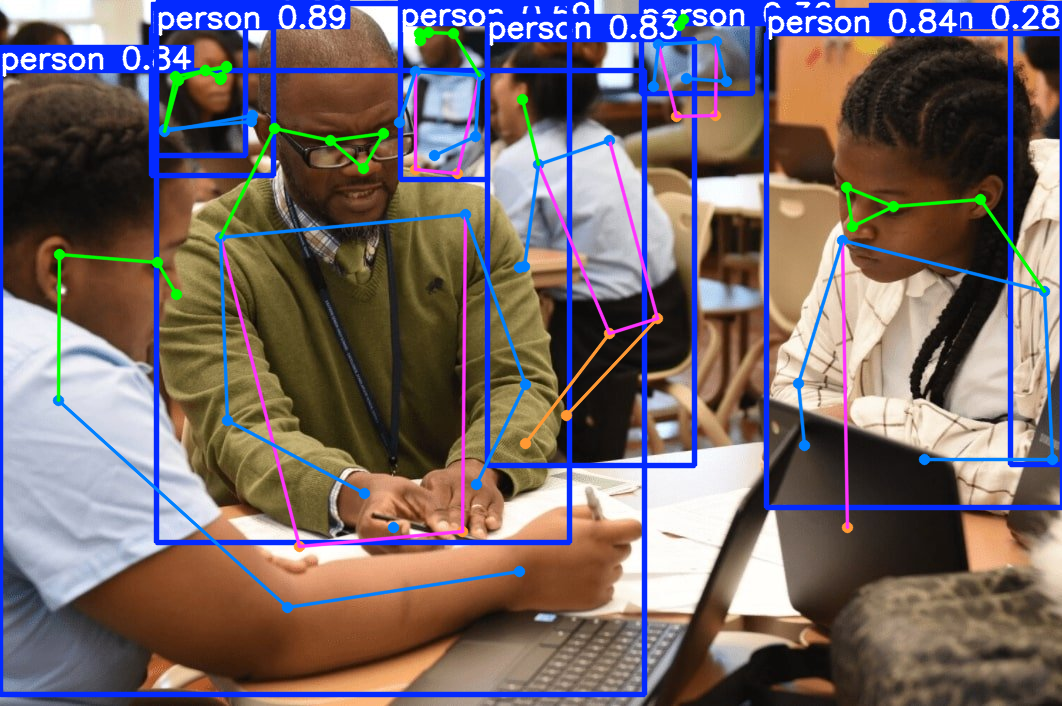

In [ ]:
# Run batched inference on a list of images
results = model(["/content/Social-Media-Image-min.jpg"])  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk

In [ ]:
result[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.8948])
data: tensor([[156.0000,   3.0000, 569.0000, 542.0000,   0.8948,   0.0000]])
id: None
is_track: False
orig_shape: (706, 1062)
shape: torch.Size([1, 6])
xywh: tensor([[362.5000, 272.5000, 413.0000, 539.0000]])
xywhn: tensor([[0.3413, 0.3860, 0.3889, 0.7635]])
xyxy: tensor([[156.,   3., 569., 542.]])
xyxyn: tensor([[0.1469, 0.0042, 0.5358, 0.7677]])

In [ ]:
result.boxes.xyxy

tensor([[ 156.,    3.,  569.,  542.],
        [ 766.,   33., 1062.,  507.],
        [   0.,   70.,  644.,  694.],
        [ 487.,   39.,  694.,  465.],
        [ 400.,    0.,  487.,  179.],
        [ 151.,   27.,  273.,  175.],
        [ 641.,    0.,  752.,   93.],
        [1010.,    3., 1062.,  464.],
        [ 156.,   25.,  245.,  155.]])

In [ ]:
a = result.keypoints.data[0].cpu().numpy().astype(np.int16)
a, a[:,0].max(), a[:,0].min(), a[:,1].max(), a[:,1].min()

(array([[363, 168,   0],
        [383, 133,   0],
        [330, 140,   0],
        [  0,   0,   0],
        [274, 128,   0],
        [465, 214,   0],
        [220, 237,   0],
        [525, 384,   0],
        [227, 420,   0],
        [476, 484,   0],
        [364, 493,   0],
        [462, 531,   0],
        [299, 546,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]], dtype=int16),
 525,
 0,
 546,
 0)

In [ ]:
result.save(filename="result.jpg",
            conf=True,
        # line_width=None,
        # font_size=None,
        pil=False,
        img=None,
        im_gpu=None,
        kpt_radius=5,
        kpt_line=True,
        labels=False,
        boxes=False,
        masks=True,
        probs=False,
        show=False,)

'result.jpg'

In [ ]:
boxes.data.cpu()[:,:4].numpy().astype(np.int16)

array([[ 156,    3,  569,  542],
       [ 766,   33, 1062,  507],
       [   0,   70,  644,  694],
       [ 487,   39,  694,  465],
       [ 400,    0,  487,  179],
       [ 151,   27,  273,  175],
       [ 641,    0,  752,   93],
       [1010,    3, 1062,  464],
       [ 156,   25,  245,  155]], dtype=int16)

In [ ]:
keypoints.data.cpu().numpy().shape

(9, 17, 3)

In [ ]:
np.array([]).shape[0]

0

In [ ]:
IMG_SIZE_H = 480
IMG_SIZE_W = 640

In [ ]:
import tensorflow as tf
import numpy as np
from glob import glob
from tqdm.auto import tqdm
from sklearn.preprocessing import LabelBinarizer
from PIL import Image
import os
def build_feature_extractor_imagenet():
    feature_extractor = tf.keras.applications.InceptionV3(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE_H, IMG_SIZE_W, 3),
    )
    preprocess_input = tf.keras.applications.inception_v3.preprocess_input
    inputs = tf.keras.Input((IMG_SIZE_H, IMG_SIZE_W, 3))
    preprocessed = preprocess_input(inputs)
    outputs = feature_extractor(preprocessed)
    return tf.keras.Model(inputs, outputs, name="feature_extractor_imgnet")

feature_extractor_imagenet = build_feature_extractor_imagenet()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
boxes.data.cpu()[:,:4].numpy().astype(np.int16)

array([[ 156,    3,  569,  542],
       [ 766,   33, 1062,  507],
       [   0,   70,  644,  694],
       [ 487,   39,  694,  465],
       [ 400,    0,  487,  179],
       [ 151,   27,  273,  175],
       [ 641,    0,  752,   93],
       [1010,    3, 1062,  464],
       [ 156,   25,  245,  155]], dtype=int16)

In [ ]:
from ultralytics import SAM

# Load a model
model = SAM("sam_b.pt")

# Display model information (optional)
model.info()

# Run inference with bboxes prompt
results = model("/content/Social-Media-Image-min.jpg", bboxes=boxes.data.cpu()[:,:4].numpy().astype(np.int16))

100%|██████████| 358M/358M [00:01<00:00, 269MB/s]


Model summary: 243 layers, 93,735,472 parameters, 93,735,472 gradients

image 1/1 /content/Social-Media-Image-min.jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 33872.6ms
Speed: 11.7ms preprocess, 33872.6ms inference, 76.1ms postprocess per image at shape (1, 3, 1024, 1024)


In [ ]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8'}
 obb: None
 orig_img: array([[[250, 255, 251],
         [248, 254, 249],
         [248, 251, 249],
         ...,
         [164, 190, 220],
         [156, 180, 210],
         [148, 172, 202]],
 
        [[251, 255, 249],
         [250, 254, 248],
         [251, 252, 248],
         ...,
         [158, 184, 214],
         [149, 173, 203],
         [141, 165, 195]],
 
        [[252, 253, 244],
         [252, 253, 244],
         [253, 253, 247],
         ...,
         [147, 173, 203],
         [137, 161, 191],
         [128, 152, 182]],
 
        ...,
 
        [[131, 120, 112],
         [133, 123, 113],
         [133, 122, 114],
         ...,
         [ 21,  24,  32],
         [ 22,  25,  33],
         [ 21,  27,  34]],
 
        [[128, 1

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread("/content/Social-Media-Image-min.jpg")  # Replace with your image file
height, width = image.shape[:2]

# Your bounding boxes (provided as input)
boxes = np.array([[156, 3, 569, 542], [766, 33, 1062, 507]], dtype=np.int16)

# Create a mask with the same size as the image, initialized to zeros (black)
mask = np.zeros((height, width), dtype=np.uint8)

# Fill the bounding boxes in the mask with white (255)
for box in boxes:
    x1, y1, x2, y2 = box
    mask[y1:y2, x1:x2] = 255

# Blur the entire image
blurred_image = cv2.GaussianBlur(image, (51, 51), 0)  # Adjust the kernel size (51, 51) as needed

# Create the inverse of the mask
inverse_mask = cv2.bitwise_not(mask)

# Use the mask to keep the regions inside the bounding boxes clear
result = cv2.bitwise_and(image, image, mask=mask)

# Use the inverse mask to keep the blurred areas outside the boxes
blurred_outside = cv2.bitwise_and(blurred_image, blurred_image, mask=inverse_mask)

# Combine the result: clear inside boxes + blurred outside
final_image = cv2.add(result, blurred_outside)

# Save or display the final image
cv2.imwrite("blurred_outside_boxes.jpg", final_image)
# cv2.imshow("Blurred Outside Boxes", final_image)
# cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

def blur_outside_boxes(image, boxes, blur_strength=51):
    """
    Blurs the area outside the specified bounding boxes.

    Args:
        image: The input image as a NumPy array.
        boxes: A list of bounding boxes, each specified as [x1, y1, x2, y2].
        blur_strength: The strength of the blur, must be an odd number (default is 51).

    Returns:
        The image with blurred areas outside the bounding boxes.
    """
    height, width = image.shape[:2]

    # Ensure blur_strength is odd (required for GaussianBlur)
    if blur_strength % 2 == 0:
        blur_strength += 1

    # Create a mask with the same size as the image, initialized to zeros (black)
    mask = np.zeros((height, width), dtype=np.uint8)

    # Fill the bounding boxes in the mask with white (255)
    for box in boxes:
        x1, y1, x2, y2 = box
        mask[y1:y2, x1:x2] = 255

    # Blur the entire image with the specified blur strength
    blurred_image = cv2.GaussianBlur(image, (blur_strength, blur_strength), 0)

    # Create the inverse of the mask
    inverse_mask = cv2.bitwise_not(mask)

    # Use the mask to keep the regions inside the bounding boxes clear
    result = cv2.bitwise_and(image, image, mask=mask)

    # Use the inverse mask to keep the blurred areas outside the boxes
    blurred_outside = cv2.bitwise_and(blurred_image, blurred_image, mask=inverse_mask)

    # Combine the result: clear inside boxes + blurred outside
    final_image = cv2.add(result, blurred_outside)

    return final_image

# Load the image
image = cv2.imread("/content/Social-Media-Image-min.jpg")  # Replace with your image file

# Your bounding boxes (provided as input)
boxes = np.array([], dtype=np.int16)

# Apply the function with a custom blur strength
blur_strength = 60  # Adjust blur strength as desired (must be odd)
final_image = blur_outside_boxes(image, boxes, blur_strength)

# Save or display the final image
cv2.imwrite("blurred_outside_boxes.jpg", final_image)
# cv2.imshow("Blurred Outside Boxes", final_image)
# cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
for i,j in zip(range(10), range(10)):
    print(i,j)

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
